# Regressão Múltipla com dados do IBGE

<img src="https://i.imgur.com/ZJlWfd7.jpeg" />

## Por que nesse projeto iremos utilizar a regressão múltipla ?

*A regressão múltipla é uma extensão da regressão linear simples. É usado quando queremos predizer o valor de uma variável com base no valor de duas ou mais outras variáveis. A variável que queremos prever é chamada de variável dependente (ou, às vezes, variável de resultado, meta ou critério). As variáveis ​​que estamos usando para prever o valor da variável dependente são chamadas de variáveis ​​independentes (ou às vezes, as variáveis ​​preditoras, explicativas ou regressivas).*

*Por exemplo, é possível usar a regressão múltipla para entender se o desempenho do exame pode ser previsto com base no tempo de revisão, na ansiedade do teste, na frequência de palestras e no sexo. Alternativamente, seria possível usar a regressão múltipla para entender se o consumo diário de cigarros pode ser previsto com base na duração do tabagismo, idade quando começou a fumar, tipo de fumante, renda e sexo.*

*A regressão múltipla também permite determinar o ajuste geral (variância explicada) do modelo e a contribuição relativa de cada um dos preditores para a variância total explicada. Por exemplo, se existe a necessidade de saber quanto da variação no desempenho do exame pode ser explicado pelo tempo de revisão, teste de ansiedade, freqüência de palestras e gênero "como um todo", mas também a "contribuição relativa" de cada variável independente para explicar variância.*

## Mas antes de sair aplicando regressão para todos os lados ele requer alguns requisitos

*Quando se escolhe analisar dados usando a regressão múltipla, parte do processo envolve a verificação para garantia de que os dados possam realmente ser analisados ​​usando a regressão múltipla. É preciso fazer isso porque só é apropriado usar a regressão múltipla se os dados "passarem" por cinco hipóteses que são necessárias para a regressão múltipla forneça resultados válidos. Na prática, a verificação desses oito pressupostos apenas adiciona um pouco mais de tempo à análise, exigindo alguns testes e visualizações dos dados, porém não representa uma tarefa difícil.*

*Antes de apresentar as cinco hipóteses sobre a análise dos dados, é importante ressaltar que é possível haver uma violação de uma ou mais dessas suposições (ou seja, suposições que não sejam atendidas). Isso não é incomum quando se trabalha com dados do mundo real em vez de exemplos de livros didáticos, que muitas vezes mostram apenas como realizar a regressão múltipla quando tudo está em estado perfeito. No entanto, mesmo quando os dados falham em certas suposições, geralmente há uma solução para superar isso. Primeiro, vamos dar uma olhada nessas cinco suposições.*

*A variável dependente deve ser medida em uma escala contínua (isto é, uma variável de intervalo ou razão). Exemplos de variáveis ​​que atendem a esse critério incluem tempo de revisão (medido em horas), inteligência (medida pelo índice de QI), desempenho do exame (medido de 0 a 100), peso (medido em kg) e assim por diante. Se a variável dependente for medida em uma escala ordinal, será necessário realizar uma regressão ordinal em vez de uma regressão múltipla. Exemplos de variáveis ​​ordinais incluem itens Likert (por exemplo, uma escala de 7 pontos de "concordo totalmente" até "discordo totalmente"), entre outras formas de classificação de categorias (por exemplo, uma escala de 3 pontos explicando quanto um cliente gostou de um produto , variando de "Não muito" para "Sim, muito".*

*Além disso, é necessário ter duas ou mais variáveis ​​independentes, que podem ser contínuas (isto é, uma variável de intervalo ou razão) ou categóricas (ou seja, uma variável ordinal ou nominal). Exemplos de variáveis ​​nominais incluem gênero (por exemplo, 2 grupos: masculino e feminino), etnia (por exemplo, 3 grupos: caucasianos, afro-americanos e hispânicos), nível de atividade física (por exemplo, 4 grupos: sedentários, baixos, moderados e altos) profissão (por exemplo, 5 grupos: cirurgião, médico, enfermeiro, dentista, terapeuta) e assim por diante. Se uma de suas variáveis ​​independentes for dicotômica e considerada uma variável moderadora, talvez seja necessário executar uma análise de moderador Dicotômica.*

**Os 7 requisitos são:**
- Relação Linear.
- Independência das Observações (Multicolinearidade).
- Distribuição normal dos erros.
- Outliers (Não deve haver outliers significativos).
- Homocedasticidade
- Heterogeneidade.
- Endogeneidade

## Vamos aos dados:

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
%time df = pd.read_csv('C:/Users/skite/OneDrive/Documentos/GitHub/Projeto_Regressao_multipla/demografia.csv', sep = ',', encoding  = 'ISO-8859-1')

Wall time: 115 ms


In [3]:
df.head()

,seq,id,idade,sexo,anos_estudo,cor/raca,salario,estado_civil,regiao
0,0,1.100190e+10,53,homem,5.0,Parda,63600.000000,1.0,norte
1,1,1.100190e+10,49,mulher,8.0,Amarela,NaN,1.0,norte
2,2,1.100190e+10,22,mulher,11.0,Indigena,4352.400391,0.0,nordeste
3,3,1.100190e+10,55,homem,15.0,Amarela,96600.000000,1.0,norte
4,4,1.100190e+10,56,mulher,15.0,Amarela,157800.000000,1.0,norte


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66470 entries, 0 to 66469
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   seq           66470 non-null  int64  
 1   id            66470 non-null  float64
 2   idade         66470 non-null  int64  
 3   sexo          66470 non-null  object 
 4   anos_estudo   66036 non-null  float64
 5   cor/raca      66228 non-null  object 
 6   salario       47878 non-null  float64
 7   estado_civil  66470 non-null  float64
 8   regiao        66470 non-null  object 
dtypes: float64(4), int64(2), object(3)
memory usage: 4.6+ MB


**Note que temos algumas variáveis com valores nulos**

**Vamos verificar as quantidades nulas para as variáveis**

In [5]:
df.isnull().sum().sort_values(ascending=False).head(8)

salario         18592
anos_estudo       434
cor/raca          242
regiao              0
estado_civil        0
sexo                0
idade               0
id                  0
dtype: int64

In [6]:
(df.isnull().sum() / df.isnull().count() ).sort_values( ascending=False ).head(4)

salario        0.279705
anos_estudo    0.006529
cor/raca       0.003641
regiao         0.000000
dtype: float64

**Temos 27% da variável salario nulo isso é um problema**

**Verificando as estatísticas descritivas**

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
seq,66470.0,3.323450e+04,1.918838e+04,0.000000e+00,1.661725e+04,3.323450e+04,4.985175e+04,6.646900e+04
id,66470.0,3.445307e+10,1.292491e+10,1.100190e+10,3.110060e+10,3.316781e+10,4.310361e+10,5.311702e+10
idade,66470.0,3.763481e+01,1.138016e+01,2.000000e+01,2.800000e+01,3.700000e+01,4.700000e+01,6.000000e+01
anos_estudo,66036.0,8.686065e+00,3.374522e+00,5.000000e+00,5.000000e+00,8.000000e+00,1.100000e+01,1.500000e+01
salario,47878.0,1.970679e+04,8.862753e+04,-1.000000e+00,3.780000e+03,7.113600e+03,1.272000e+04,9.999990e+05
estado_civil,66470.0,5.877238e-01,4.922481e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


**OK, temos algumas variáveis com o desvio padrão muito alto sendo que seq e id podem ser desconsiderado**

**Vamos fazer um plot de distruição para visualizar melhor**

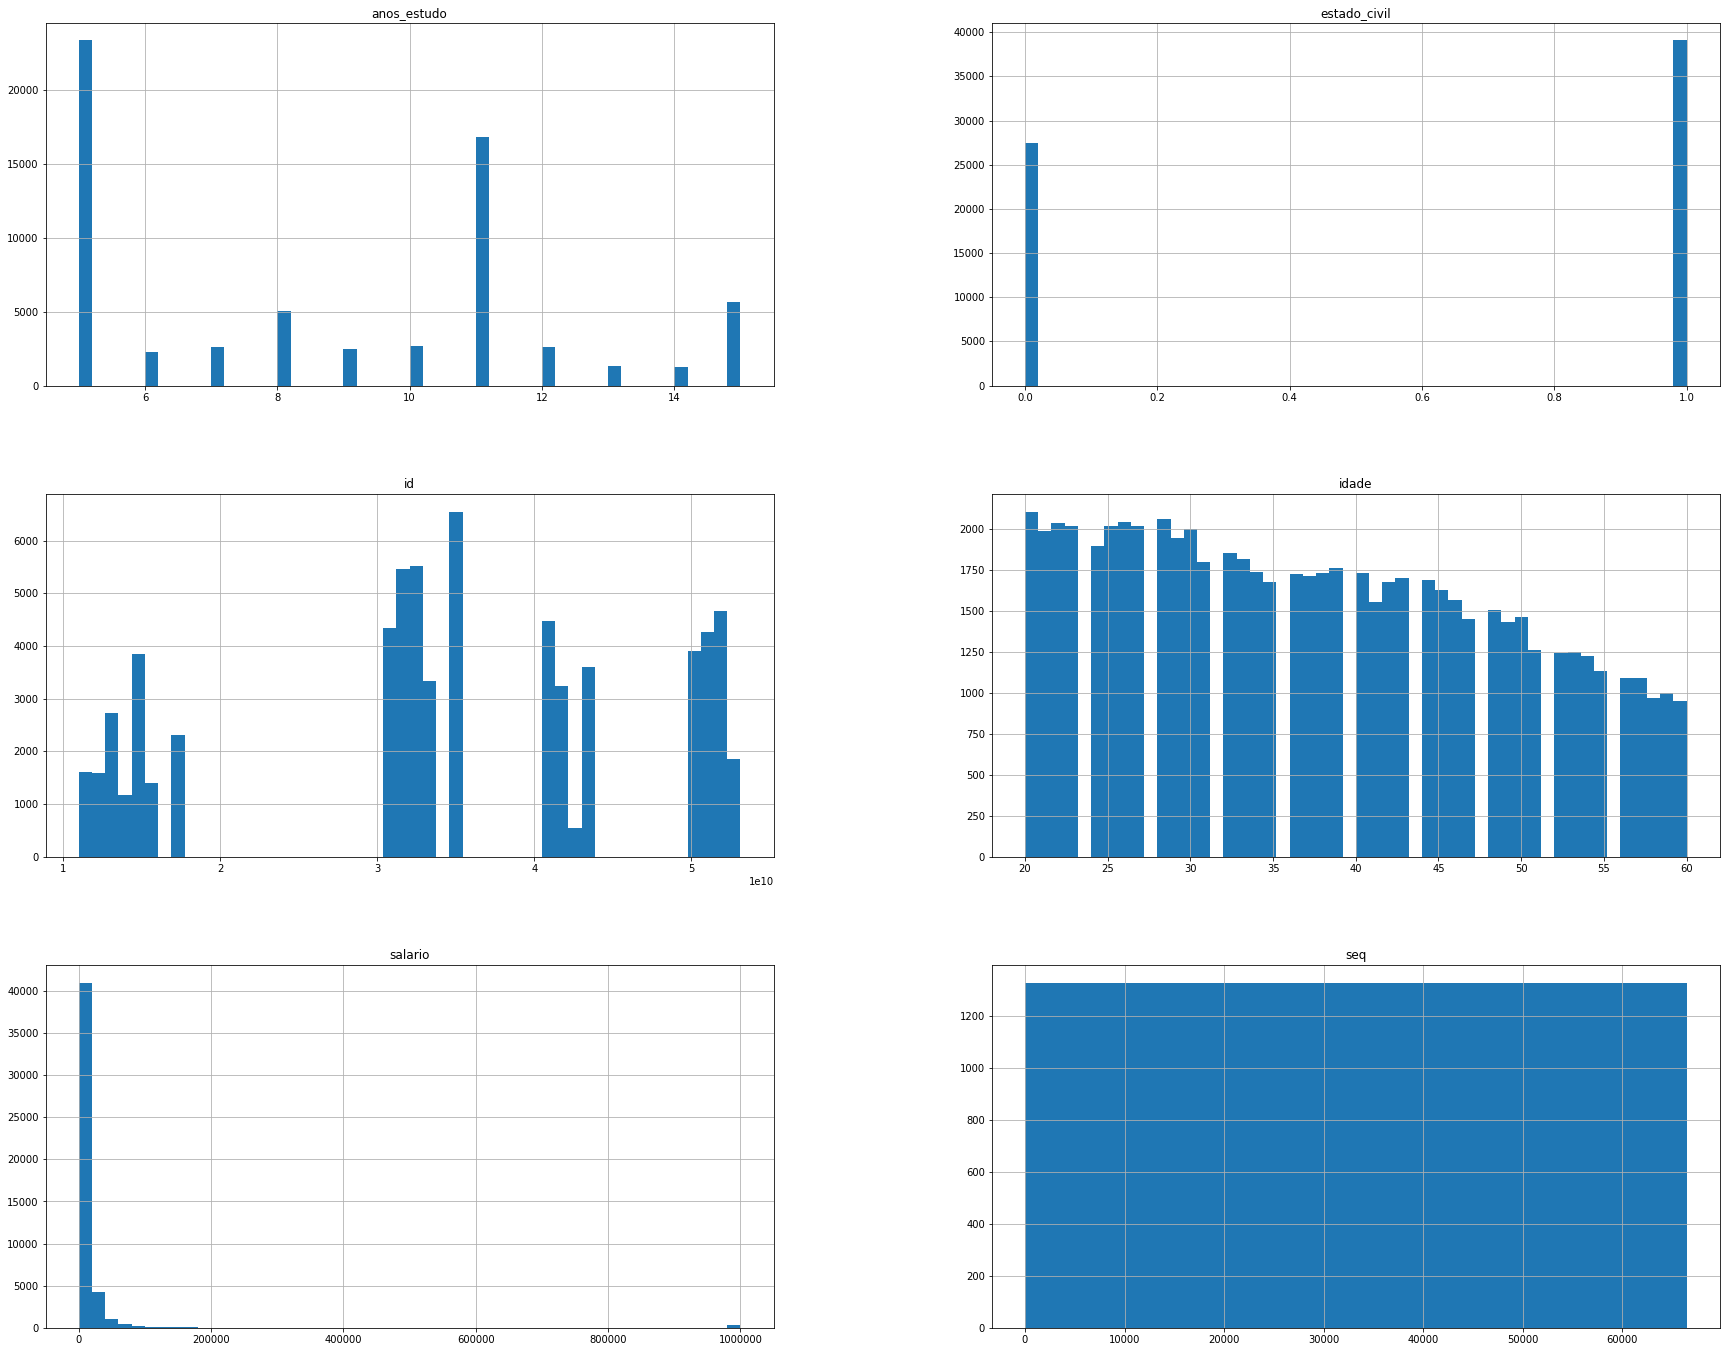

In [8]:
df.hist(figsize=(30,24),bins = 50)
plt.show()

**Essa distribuição não nos ajudou muito em nossa análise, vamos plotar a variável salario de forma individual para melhor visualização**

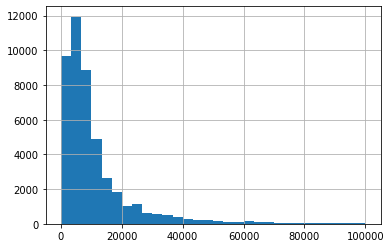

In [9]:
df.salario.hist(bins=30, range=(0,100000))

**Note que esse variável está totalmente assimétrica, logo será necessário fazer o ajuste da mesma.**

### Vamos análisar a correlação entre as variáveis

**Calculando a correlação entre todas as variaveis:**

In [10]:
df.corr().round(3)

,seq,id,idade,anos_estudo,salario,estado_civil
seq,1.000,0.970,0.045,0.017,0.018,0.036
id,0.970,1.000,0.052,0.036,0.022,0.029
idade,0.045,0.052,1.000,-0.223,0.122,0.210
anos_estudo,0.017,0.036,-0.223,1.000,0.101,-0.119
salario,0.018,0.022,0.122,0.101,1.000,0.031
estado_civil,0.036,0.029,0.210,-0.119,0.031,1.000


**Identificando o comportamento de todas as variáveis entre si por Pairplot**

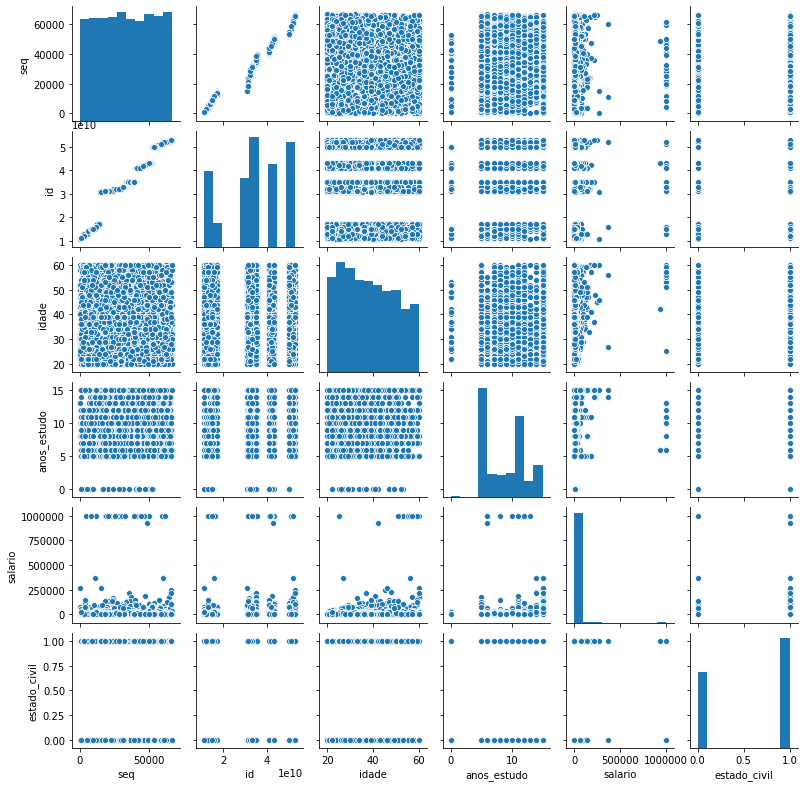

In [11]:
sns.pairplot(data=df.fillna(0).sample(5000),size=1.8)

**Plotando a correlação de todas as variáveis entre si por HEATMAP**

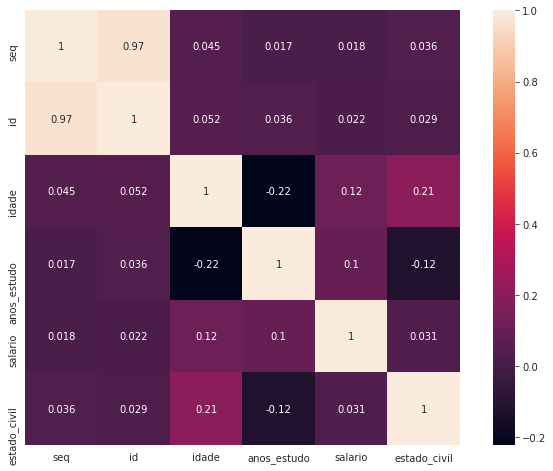

In [12]:
corr = df.corr()

with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(12, 8));
    
    sns.heatmap(
        corr,
        ax=ax,
        annot=True,
        square=True
    );

**Note que a correlação entre as variáveis "importantes" é muito baixa, temos alguma coisa com estado civil x idade e salario x idade.**

### Ok, Vamos nos aprofundar mais em nossa análise exploratória, Qual a relação entre idade e salário ?

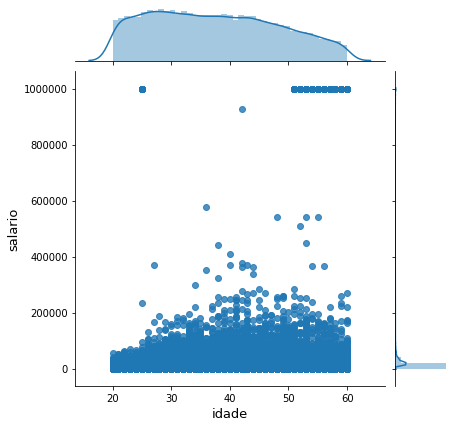

In [13]:
sns.jointplot(x="idade", y="salario", data=df, kind='reg') 
plt.ylabel('salario', fontsize=13)
plt.xlabel('idade', fontsize=13)
plt.show()

**Note que temos alguns outliers.**

**Uma outra ferramenta inclível para a visualização e indentificação de outliers é o BoxPlot eo ViolinPlot**

**BoxPlot**

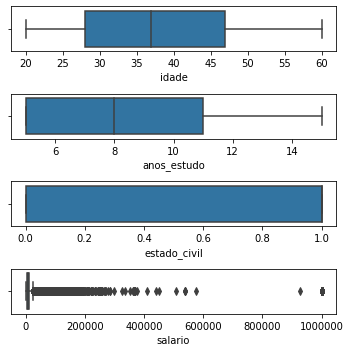

In [14]:
fig, axs = plt.subplots(4, figsize = (5,5))
plt1 = sns.boxplot(df['idade'], ax = axs[0])
plt2 = sns.boxplot(df['anos_estudo'], ax = axs[1])
plt3 = sns.boxplot(df['estado_civil'], ax = axs[2])
plt4 = sns.boxplot(df['salario'], ax = axs[3])
plt.tight_layout()

**ViolinPlot**

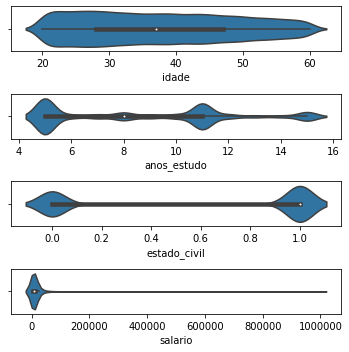

In [15]:
fig, axs = plt.subplots(4, figsize = (5,5))
plt1 = sns.violinplot(df['idade'], ax = axs[0])
plt2 = sns.violinplot(df['anos_estudo'], ax = axs[1])
plt3 = sns.violinplot(df['estado_civil'], ax = axs[2])
plt4 = sns.violinplot(df['salario'], ax = axs[3])
plt.tight_layout()

**Voltando a análise da correlação entre idade x salário**

**Agrupando as pessoas da mesma idade e plotando a evolução da média do salário**

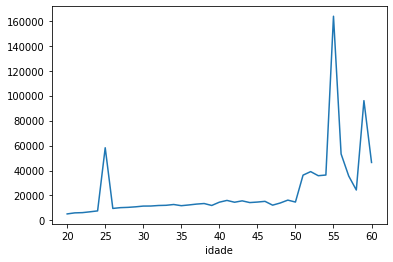

In [16]:
df.groupby('idade')['salario'].mean().plot()

**Podemos identificar que temos um pico aos 25 anos com uma queda e a partir de 35 anos de idade, a curva começa a apresentar uma variância maior nos dados - isso se deve ao fato do número de observações cair bastante. Vamos utilizar o módulo .size para ver o comportamento do número de observações da idade em relação ao salário.**

In [17]:
df.groupby('idade')['salario'].mean().sort_values(ascending=False)

idade
55    163652.003350
59     96001.356372
25     58236.290118
56     53279.861357
60     46445.270171
52     39113.518418
54     36372.890962
51     36283.966212
53     35830.167294
57     35616.873214
58     24371.725991
49     16267.617843
41     16027.829509
43     15681.725990
46     15283.056385
50     14714.369410
45     14710.026607
40     14609.476545
42     14563.146304
44     14298.514103
48     13957.008727
38     13536.174300
37     13083.652805
34     12754.615582
36     12396.695185
47     12228.743402
33     12113.551293
39     11985.424729
32     11952.636995
35     11796.099553
31     11532.726613
30     11482.015605
29     10895.058597
28     10464.220615
27     10232.855018
26      9598.127051
24      7629.206917
23      6902.417044
22      6229.897810
21      6042.840839
20      5206.713386
Name: salario, dtype: float64

**Note que os maiores picos no grafico acima estão relacionado com as maiores médias salariais isso tem um forte indício de outliers.**

**Vamos Agrupando as pessoas da mesma idade pela quantidade de observações na variável salário**

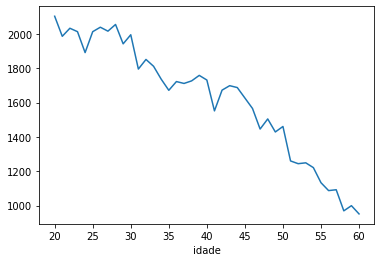

In [18]:
df.groupby('idade')['salario'].size().plot()

**Vamos rodar uma regressão linear sem tratamento dos dados para teste**

In [19]:
first_function = 'salario ~ idade'
model = smf.ols(formula=first_function, data=df).fit() 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                salario   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     726.1
Date:                Fri, 18 Sep 2020   Prob (F-statistic):          9.72e-159
Time:                        16:00:23   Log-Likelihood:            -6.1301e+05
No. Observations:               47878   AIC:                         1.226e+06
Df Residuals:                   47876   BIC:                         1.226e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.776e+04   1447.254    -12.269      0.0

**Vamos a análise do resultado da nova regressão linear:**

- R quadrado: temos uma taxa de explicabilidade de 0.015 ou seja 1,5%.
- R Quadrado ajustado: R Quadrado com o desconto do número de graus de liberdade 0.015 também
- F-Statistic (Multicolinearidade):  Em geral, o valor de F-Statistic deve ser maior que 4 e sua probabilidade ser 0 tivemos 726.1
- Log_likelihood: Para que o modelo se demontre semelhante, devemos ter um resultado negativo.
- AIC: Para um bom ajuste, o resultado deve ser um número bem próximo a zero, logo temos um AIC muito alto 1.226e+06.
- BIC: Quanto menor for seu valor, melhor é o ajuste matemático para minimização dos erros quadráticos, temos um lavor muito alto para BIC 1.226e+06
- Omnibus: Seu teste de probabilidade deve tender a zero (distribuição normal dos erros), tivemos um aumento significativo do omnibus para 74605.498.
- Durbin-Watson (Endogeneidade):Dessa forma, o valor esperado para o teste Durbin-Watson deve estar próximo de 2 para indicar erros aleatórios independentes, ficou próximo temos 1.946
- Jarque-Bera (Distribuição-Normal dos Erros): seu teste de probabilidade deve tender a zero (distribuição normal dos erros), tivemos 25049851.485 muito alto
- Condition No. (Multicolinearidade):  Deve ter valores entre 10 e 30, também ficou com um valor muito alto 141.

### Rodando a mesma regressão sem os OUTLIERS

**Desta vez vamos rodar a regressão através de uma função**

*Rodando uma regressão OLS (Ordinary Least Squares) entre salário e idade* 

In [20]:
def run_regression(df,function):
    model = smf.ols(function, df).fit()
    print(model.summary())
    return model 

*Definindo uma máscara para eliminar os Outliers*

In [21]:
mascara = df.salario < 999999
run_regression(df[mascara],'salario ~ idade')

                            OLS Regression Results                            
Dep. Variable:                salario   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     653.6
Date:                Fri, 18 Sep 2020   Prob (F-statistic):          3.43e-143
Time:                        16:00:30   Log-Likelihood:            -5.3961e+05
No. Observations:               47511   AIC:                         1.079e+06
Df Residuals:                   47509   BIC:                         1.079e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3702.7591    343.225     10.788      0.0

**Podemos observar o quanto o modelo melhora somente com a remoção dos outliers ou valores inconsistentes fora do intervalo esperado, para a variável salário**

**A interpretação da variável idade está em olhar para sua linha de resultados e observar que o coeficiente Beta representa a taxa de variação do salário (em Reais) a cada unidade de medida da idade (em anos), e que podemos considerar este Beta como um valor médio para uma distribuição normal formada com os resultados de Desvio-Padrão (std err), números de Desvios-Padrão até o zero (t), probabilidade de o coeficiente ser zero ou probabilidade de t (p>|t|), e o intervalo de confiança do Beta dentro do nível de significância de 95%. Com isso, a melhor estratégia é estudar o comportamento da variável salário.**

### Ajustando a variavél salário

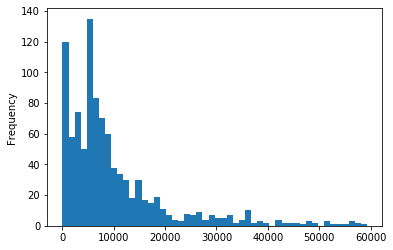

In [22]:
temp = df[df.salario<999999].sample(1000)

temp[temp.salario<60000].salario.plot.hist(bins=50)

**Note que mesmo utilizando uma máscara para retirar os outliers a variável está totalmente assimétrica**

Text(0.5, 1.0, 'Distribuição de Salarios')

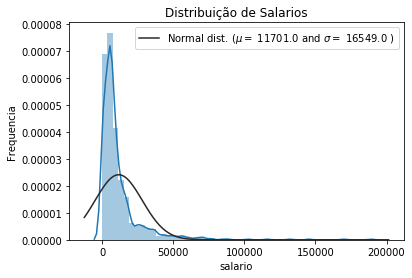

In [23]:
# Plotando a distribuição dos salários
sns.distplot(temp['salario'].fillna(0), fit=stats.norm);
(mu, sigma) = stats.norm.fit(temp['salario'].fillna(0)) # para calcular a média e o desvio-padrão
plt.legend([f'Normal dist. ($\mu=$ {round(mu,0)} and $\sigma=$ {round(sigma,0)} )'],loc='best')
plt.ylabel('Frequencia')
plt.title('Distribuição de Salarios')

**Plotando a variação do salário pelo gráfico QQ-plot (variação dos quartis)**

**Comparação da variação por quartil da distribuição normal versus a distribuição real**

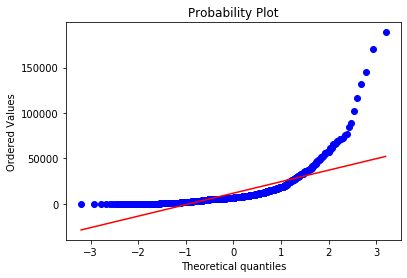

In [24]:
fig = plt.figure()
res = stats.probplot(temp['salario'], plot=plt)
plt.show()

**Para variáveis com valores "explosivos" ou com excesso de outliers (ou em casos mais complexos com excesso de heterocedasticidade devemos transformar a amostra com a função log.**

**Plotando o histograma da função log do salário para verificar sua distribuição**

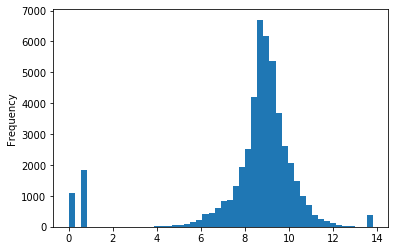

In [25]:
df['log_salario'] = np.log(df['salario']+2)
df['log_salario'].plot.hist(bins=50)

**Note que após o log temos os dados da variável salário muito próximo de uma curva normal**

**Vamos agora criar um novo DataFrame excluindo valores altos e os zeros**

In [26]:
temp = df[(df.log_salario > 2) & (df.salario<999999)]

**Comparando graficamente.**

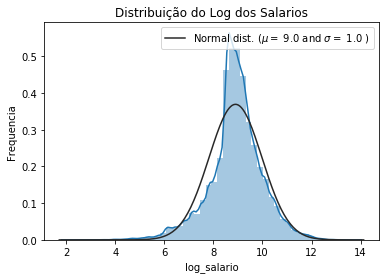

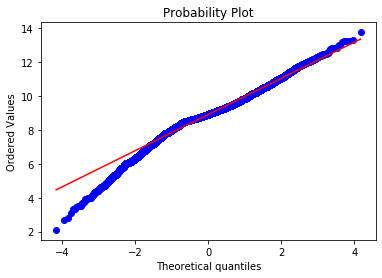

In [27]:
# Plotando a distribuição do LOG dos salários 
sns.distplot(temp['log_salario'].fillna(0), fit=stats.norm);
(mu, sigma) = stats.norm.fit(temp['log_salario'].fillna(0))
plt.legend([f'Normal dist. ($\mu=$ {round(mu,0)} and $\sigma=$ {round(sigma,0)} )'],loc='best')
plt.ylabel('Frequencia')
plt.title('Distribuição do Log dos Salarios')

# Plotando a variação do LOG do salário pelo gráfico QQ-plot (variação dos quartis)
# Comparação da variação por quartil da distribuição normal versus a distribuição real
fig = plt.figure()
res = stats.probplot(temp['log_salario'], plot=plt)
plt.show()

**A transformação do salário pela função LOG nos permite observar como o comportamento dos dados está com distribuição normal, o que vai nos permitir melhores resultados na regressão.**

### Vamos Rodar uma regressão com o log-salario e a idade

In [28]:
run_regression(temp,'log_salario ~ idade')

                            OLS Regression Results                            
Dep. Variable:            log_salario   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     763.3
Date:                Fri, 18 Sep 2020   Prob (F-statistic):          1.31e-166
Time:                        16:00:47   Log-Likelihood:                -66296.
No. Observations:               44569   AIC:                         1.326e+05
Df Residuals:                   44567   BIC:                         1.326e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.4150      0.018    460.356      0.0

**Note o quanto a regressão melhorou depois do ajuste da variável salário**

### Agora qual a relação entre anos de estudo e salário?

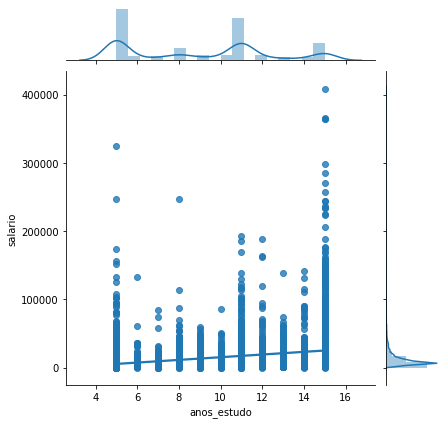

In [29]:
sns.jointplot(x="anos_estudo", y="salario", data=temp.sample(10000), kind='reg')

**Novamente a vizualização dessa duas variáveis não nos ajuda a ver alguma relação, temos alguns outliers e pico muito fortes com 5, 11, 15 anos de estudos precisamos intender melhor o que está acontecendo.**

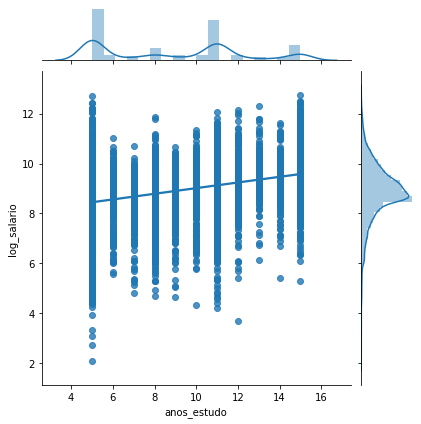

In [30]:
sns.jointplot(x="anos_estudo", y="log_salario", data=temp.sample(10000), kind='reg') 

**Mesmo com a utilização de log_salario não conseguiremos tirar uma conclusão.** 

**Rodando a regressão com o salário, sem a transformação dos dados**

In [31]:
run_regression(temp,'salario ~ anos_estudo')

                            OLS Regression Results                            
Dep. Variable:                salario   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     4171.
Date:                Fri, 18 Sep 2020   Prob (F-statistic):               0.00
Time:                        16:00:57   Log-Likelihood:            -5.0184e+05
No. Observations:               44243   AIC:                         1.004e+06
Df Residuals:                   44241   BIC:                         1.004e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3387.9726    271.150    -12.495      

**Podemos calcular o salário para uma pessoa com 15 anos de estudo, utilizando os BETAS da regressão**

In [32]:
anos_estudo=15
-3387.9726 + anos_estudo*1825.5288

23994.9594

**Então em média uma pessoa que dedicar 15 anos de estudo pode ganhar 23994,96 anuais.**

**Agora vamos rodar uma regressão entre log_salario e anos_estudo**

In [33]:
run_regression(temp,'log_salario ~ anos_estudo')

                            OLS Regression Results                            
Dep. Variable:            log_salario   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     6243.
Date:                Fri, 18 Sep 2020   Prob (F-statistic):               0.00
Time:                        16:01:01   Log-Likelihood:                -63290.
No. Observations:               44243   AIC:                         1.266e+05
Df Residuals:                   44241   BIC:                         1.266e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       7.9101      0.013    588.615      

**É possível observar como o R quadrado aumanta, o que significa que a variável independente (anos de estudo) consegue explicar muito mais da variação do salário após a transformação por LOG.**

**Outro ponto importante na regressão com o log_salario é a interpretação dos Betas, que antes eram uma taxa de variação do salário (em Reais) para cada anos de estudo (em anos), e agora passa a ser uma taxa de variação porcentual, ou seja, a cada ano de estudo o saláro aumenta de acordo com a porcentagem do valor do Beta.**

**Ou Sejá 11% em cada ano de estudo**

### Regressão Múltipla

**Ao Adicionar idade na regressão de anos de estudo saimos da regressão simples e vamos para a regressão multipla, no output não muda quase nada, apenas uma linha a mais. Mas a interpretação muda muito!**

*Rodando uma regressão múltipla do log-salario com idade e anos de estudo*

In [34]:
run_regression(temp,'log_salario ~ anos_estudo + idade')

                            OLS Regression Results                            
Dep. Variable:            log_salario   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     4387.
Date:                Fri, 18 Sep 2020   Prob (F-statistic):               0.00
Time:                        16:01:05   Log-Likelihood:                -62208.
No. Observations:               44243   AIC:                         1.244e+05
Df Residuals:                   44240   BIC:                         1.244e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       7.0103      0.023    302.528      

**Como a correlação entre idade e anos de estudo é negativa, quando acrescentamos a idade no modelo, o coeficiente de anos de estudo aumenta, o que representa uma maior variação do salário com os anos de estudo simplesmente pelo acréscimo da idade na regressão.**

### Vamos Investigar a relação entre salário e estado civil

In [35]:
df['estado_civil'].value_counts()

1.0    39066
0.0    27404
Name: estado_civil, dtype: int64

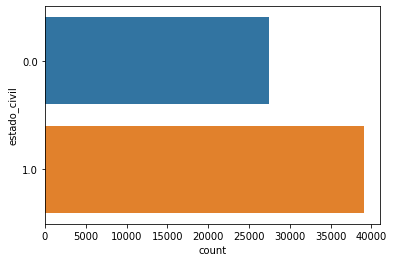

In [36]:
sns.countplot(y=df['estado_civil'] ,data=df)
plt.show()

**Temos mais pessoas casadas que solteira.**

In [37]:
df[['salario', 'estado_civil']].head(10)

,salario,estado_civil
0,63600.000000,1.0
1,NaN,1.0
2,4352.400391,0.0
3,96600.000000,1.0
4,157800.000000,1.0
5,88550.000000,0.0
6,6734.400391,0.0
7,14875.200684,0.0
8,6734.400391,0.0
9,54300.000000,1.0


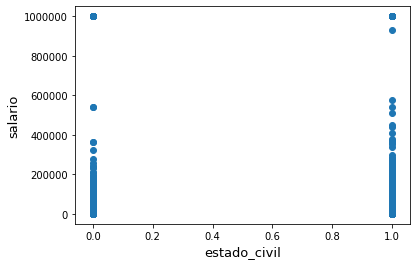

In [38]:
fig, ax = plt.subplots()
ax.scatter(x = df['estado_civil'], y = df['salario'])
plt.ylabel('salario', fontsize=13)
plt.xlabel('estado_civil', fontsize=13)
plt.show()

**Gráfico de distribuição dos salários para pessoas casadas sem outliers.**

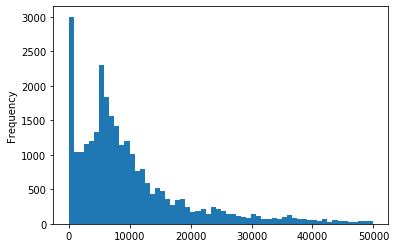

In [39]:
mascara_salario_alto = df.salario<50000
mascara_casado = df.estado_civil == 1
df[(mascara_salario_alto) & (mascara_casado)]['salario'].plot.hist(bins=60)

**Gráfico de distribuição dos salários para pessoas não-casadas sem outliers.**

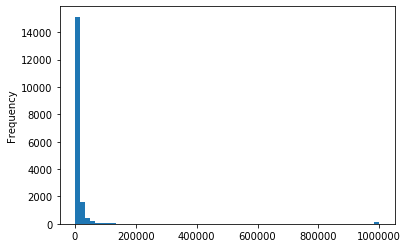

In [40]:
mascara_salario_baixo = df.salario > 50
mascara_casado = df.estado_civil == 1
mascara_nao_casado = df.estado_civil == 0
df[(mascara_salario_baixo) & (mascara_nao_casado)]['salario'].plot.hist(bins=60)

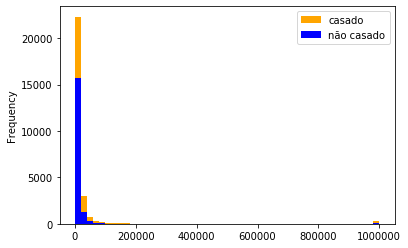

In [41]:
df[(mascara_salario_baixo) & (mascara_casado)]['salario'].plot.hist(bins=50,color='orange',label='casado')
df[(mascara_salario_baixo) & (mascara_nao_casado)]['salario'].plot.hist(bins=50,color='blue',label='não casado')
plt.legend()
plt.show()

**Apesar de termos mais casados que solteiro note que as duas distribuições estão muito próximas uma da outra.**

**Plotando o mesmo gráfico com a utilização da função log**

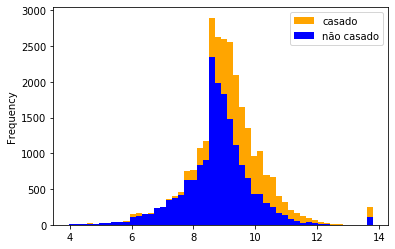

In [42]:
df[(mascara_salario_baixo) & (mascara_casado)]['log_salario'].plot.hist(bins=50,color='orange',label='casado')
df[(mascara_salario_baixo) & (mascara_nao_casado)]['log_salario'].plot.hist(bins=50,color='blue',label='não casado')
plt.legend()
plt.show()

**OK, agora vamos adicionando mais variáveis e rodando a regressão múltipla.**

In [43]:
function_full = '''log_salario ~  sexo + idade + anos_estudo + estado_civil'''
# Criando um modelo model_full
model_full = smf.ols(function_full, temp.dropna()).fit()
print(model_full.summary())

                            OLS Regression Results                            
Dep. Variable:            log_salario   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     2892.
Date:                Fri, 18 Sep 2020   Prob (F-statistic):               0.00
Time:                        16:01:25   Log-Likelihood:                -59759.
No. Observations:               44111   AIC:                         1.195e+05
Df Residuals:                   44105   BIC:                         1.196e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          6.5177      0.196     33.

**Tivemos uma melhora significativa no R-squared isso indica que temos uma taxa de explicabilidade para a variável salário cada vez melhor.**

### Agora vamos Investigar a relação entre salário e sexo

In [44]:
df['sexo'].value_counts()

mulher      33607
homem       32791
gestante       72
Name: sexo, dtype: int64

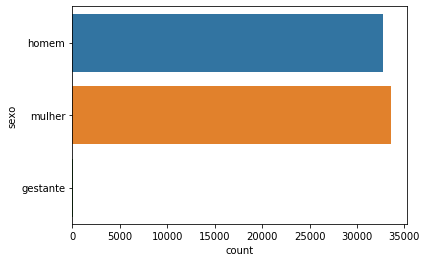

In [45]:
sns.countplot(y=df['sexo'] ,data=df)
plt.show()

**Note que na variável sexo temos além de homen e mulher também temos gestantes em uma quantidade muito baixa.**

**Vamos idenficar a categoria da variável SEXO que tem o salário médio mais distante do valor médio de SALARIO**

In [46]:
mean_homem = temp[temp.sexo == 'homem']['salario'].mean()
mean_mulher = temp[temp.sexo == 'mulher']['salario'].mean()
mean_gestante = temp[temp.sexo == 'gestante']['salario'].mean()

mean_sexo = [mean_homem, mean_mulher, mean_gestante]

df_sexo = pd.DataFrame(mean_sexo, index =['homem','mulher','gestante'], 
                                              columns =['media_salario']) 
df_sexo['salario_medio'] = temp.salario.mean()
df_sexo['diff_salario_medio'] = df_sexo['media_salario'] - df_sexo['salario_medio']
df_sexo

,media_salario,salario_medio,diff_salario_medio
homem,14927.173425,12935.519646,1991.653779
mulher,10027.410809,12935.519646,-2908.108837
gestante,3979.102629,12935.519646,-8956.417017


**Podemos concluir que a categoria GESTANTE tem a média salarial mais distante da média dos salários de todas as pessaos do DataSet, por isso ela é estatísticamente mais significativa ou diferente, fazendo com que se torne a referência, evitando assim redundância e multicolinearidade dos dados. Isto significa que a categoria GESTANTE acaba sendo omitida dos resultados da regressão.**

### Agora vamos investigar a variável cor raça

In [47]:
temp.rename(columns={'cor/raca': 'cor_raca'}, inplace=True)

In [48]:
temp['cor_raca'].value_counts()

Branca      21599
Parda       18714
Preta        3609
Indigena      302
Amarela       212
Name: cor_raca, dtype: int64

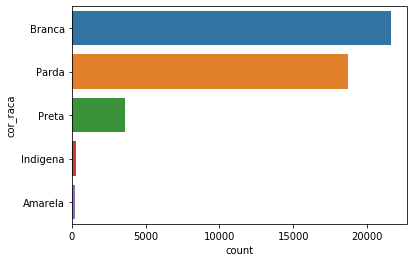

In [49]:
sns.countplot(y=temp['cor_raca'] ,data=df, order = temp['cor_raca'].value_counts().index)
plt.show()

**Explorando a variável DUMMY Cor/raca**

**Idenficando a categoria da variável COR_RACA que tem o salário médio mais distante do valor médio de SALARIO**

In [50]:
mean_parda = temp[temp.cor_raca == 'Parda']['salario'].mean()
mean_indigena = temp[temp.cor_raca == 'Indigena']['salario'].mean()
mean_amarela = temp[temp.cor_raca == 'Amarela']['salario'].mean()
mean_branca = temp[temp.cor_raca == 'Branca']['salario'].mean()
mean_preta = temp[temp.cor_raca == 'Preta']['salario'].mean()

mean_cor_raca = [mean_amarela, mean_branca, mean_indigena, mean_parda, mean_preta]

df_cor_raca = pd.DataFrame(mean_cor_raca, index =['amarela','branca','indigena','parda','preta'], 
                                              columns =['media_salario']) 
df_cor_raca['salario_medio'] = temp.salario.mean()
df_cor_raca['diff_salario_medio'] = df_cor_raca['media_salario'] - df_cor_raca['salario_medio']
df_cor_raca

,media_salario,salario_medio,diff_salario_medio
amarela,23713.028541,12935.519646,10777.508895
branca,15865.108161,12935.519646,2929.588515
indigena,10534.635920,12935.519646,-2400.883726
parda,10107.991147,12935.519646,-2827.528499
preta,9751.082122,12935.519646,-3184.437524


**Note que os amarelos são a maior média entre as etnias, outro fator que pode elevar essa média pode ser devido a quantidade de amarelos nessa analise ser muito baixa em relação aos brancos e pardos.**

### Agora vamos investigar a variável região

In [51]:
temp['regiao'].value_counts()

sudeste         17059
centro-oeste     9741
norte            9507
sul              8259
nordeste            3
Name: regiao, dtype: int64

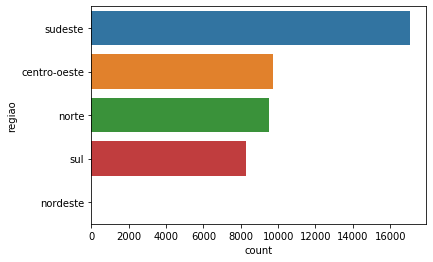

In [52]:
sns.countplot(y=temp['regiao'] ,data=df, order = temp['regiao'].value_counts().index)
plt.show()

**Idenficando a categoria da variável REGIAO que tem o salário médio mais distante do valor médio de SALARIO**

In [53]:
mean_norte = temp[temp.regiao == 'norte']['salario'].mean()
mean_nordeste = temp[temp.regiao == 'nordeste']['salario'].mean()
mean_sudeste = temp[temp.regiao == 'sudeste']['salario'].mean()
mean_sul = temp[temp.regiao == 'sul']['salario'].mean()
mean_centro_oeste = temp[temp.regiao == 'centro-oeste']['salario'].mean()

mean_regiao = [mean_nordeste,  mean_centro_oeste, mean_sul, mean_sudeste, mean_norte]

df_regiao = pd.DataFrame(mean_regiao, index =['nordeste','centro_oeste','sul','sudeste','norte'], 
                                              columns =['media_salario']) 
df_regiao['salario_medio'] = temp.salario.mean()
df_regiao['diff_salario_medio'] = df_regiao['media_salario'] - df_regiao['salario_medio']
df_regiao

,media_salario,salario_medio,diff_salario_medio
nordeste,32947.466797,12935.519646,20011.947151
centro_oeste,13986.374570,12935.519646,1050.854924
sul,13659.013246,12935.519646,723.493600
sudeste,13178.503987,12935.519646,242.984341
norte,10787.963406,12935.519646,-2147.556240


**Note que no mesmo caso da variável etnia o nordeste são a maior média entre as regiões, mas esse fator pode se dar pela quantidade de pessoas entrevistadas na região nordeste.**

### Ok agora vamos criar DUMMIES para todas as variáveis multilabel e utilizando o novo modelo em uma regressão com todas as variáveis

**Renomeando a coluna cor_raça no DataFrame original**

In [54]:
df.rename(columns={'cor/raca': 'cor_raca'}, inplace=True)

**Dummies**

In [55]:
pd.get_dummies(df).head(10)

,seq,id,idade,anos_estudo,salario,estado_civil,log_salario,sexo_gestante,sexo_homem,sexo_mulher,cor_raca_Amarela,cor_raca_Branca,cor_raca_Indigena,cor_raca_Parda,cor_raca_Preta,regiao_centro-oeste,regiao_nordeste,regiao_norte,regiao_sudeste,regiao_sul
0,0,1.100190e+10,53,5.0,63600.000000,1.0,11.060400,0,1,0,0,0,0,1,0,0,0,1,0,0
1,1,1.100190e+10,49,8.0,NaN,1.0,NaN,0,0,1,1,0,0,0,0,0,0,1,0,0
2,2,1.100190e+10,22,11.0,4352.400391,0.0,8.378942,0,0,1,0,0,1,0,0,0,1,0,0,0
3,3,1.100190e+10,55,15.0,96600.000000,1.0,11.478355,0,1,0,1,0,0,0,0,0,0,1,0,0
4,4,1.100190e+10,56,15.0,157800.000000,1.0,11.969096,0,0,1,1,0,0,0,0,0,0,1,0,0
5,5,1.100190e+10,30,15.0,88550.000000,0.0,11.391345,0,0,1,1,0,0,0,0,0,1,0,0,0
6,6,1.100190e+10,52,5.0,6734.400391,0.0,8.815281,0,0,1,0,1,0,0,0,0,0,1,0,0
7,7,1.100190e+10,29,5.0,14875.200684,0.0,9.607585,0,1,0,0,0,0,1,0,0,0,1,0,0
8,8,1.100190e+10,29,11.0,6734.400391,0.0,8.815281,0,0,1,0,0,0,1,0,0,0,1,0,0
9,9,1.100191e+10,46,15.0,54300.000000,1.0,10.902316,0,0,1,0,1,0,0,0,0,0,1,0,0


- O que o statsmodel fez foi criar uma dummy, ou seja, um valor categórico que assume 0 ou 1.
- Em outros algoritmos temos que fazer isso explicitamente.

**Vamos criar um novo DataFrame**

In [56]:
temp2=pd.get_dummies(df)
temp2.head()

,seq,id,idade,anos_estudo,salario,estado_civil,log_salario,sexo_gestante,sexo_homem,sexo_mulher,cor_raca_Amarela,cor_raca_Branca,cor_raca_Indigena,cor_raca_Parda,cor_raca_Preta,regiao_centro-oeste,regiao_nordeste,regiao_norte,regiao_sudeste,regiao_sul
0,0,1.100190e+10,53,5.0,63600.000000,1.0,11.060400,0,1,0,0,0,0,1,0,0,0,1,0,0
1,1,1.100190e+10,49,8.0,NaN,1.0,NaN,0,0,1,1,0,0,0,0,0,0,1,0,0
2,2,1.100190e+10,22,11.0,4352.400391,0.0,8.378942,0,0,1,0,0,1,0,0,0,1,0,0,0
3,3,1.100190e+10,55,15.0,96600.000000,1.0,11.478355,0,1,0,1,0,0,0,0,0,0,1,0,0
4,4,1.100190e+10,56,15.0,157800.000000,1.0,11.969096,0,0,1,1,0,0,0,0,0,0,1,0,0


**Aplicando log na variável salário para ajuste**

In [57]:
temp2['log_salario'] = np.log(temp2['salario']+2)

**Ajustando a variável região**

In [58]:
temp2.rename(columns={'regiao_centro-oeste': 'regiao_centro_oeste'}, inplace=True)

### OK, agora estamos prontos para rodar uma regressão com todas as variáveis

In [59]:
function_dummies = '''log_salario ~ idade\
+anos_estudo\
+estado_civil\
+sexo_gestante\
+sexo_homem\
+sexo_mulher\
+cor_raca_Amarela\
+cor_raca_Branca\
+cor_raca_Indigena\
+cor_raca_Parda\
+cor_raca_Preta\
+regiao_centro_oeste\
+regiao_nordeste\
+regiao_norte\
+regiao_sudeste+regiao_sul'''

model_dummies = smf.ols(formula=function_dummies, data=temp2.dropna()).fit()

print(model_dummies.summary())

                            OLS Regression Results                            
Dep. Variable:            log_salario   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     454.8
Date:                Fri, 18 Sep 2020   Prob (F-statistic):               0.00
Time:                        16:01:59   Log-Likelihood:            -1.0483e+05
No. Observations:               47538   AIC:                         2.097e+05
Df Residuals:                   47523   BIC:                         2.098e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               4.1285    

### Distribuição normal dos erros

- Segundo a propriedade das distribuições, a soma de variáveis distribuidas normalmente garante normalidade para o modelo.
- Vamos plotar um histograma dos erros, criando uma coluna RESÍDUOS em um DataFrame para confirmar a distribuição normal dos erros.
- Além disso, vamos plotar as dsitribuições do Y_PREDITO (yhat) e do Y_REAL (ytrue) para entender se o modelo está com alguma precisão.

In [60]:
model_full.resid[:5] 

0    2.083845
2   -0.038664
3    1.073525
4    2.125016
5    2.264200
dtype: float64

**Plotando a destribuição das resíduos para o model_full através de um DataFrame**

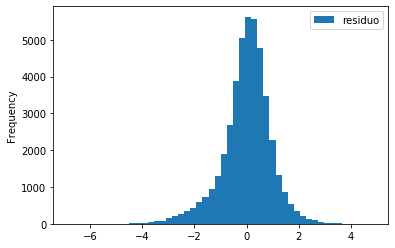

In [61]:
pd.DataFrame(model_full.resid, columns=['residuo']).plot.hist(bins=50)

### Vamos criar uma série de dados com os valores de salário predito yhat

In [62]:
yhat = model_full.predict()
yhat[:10]

array([ 8.97655533,  8.41760578, 10.40482988,  9.84408054,  9.12714539,
        8.15963683,  8.29801734,  8.55199586,  9.65209472,  9.79128318])

**Criando uma série de dados com os valores de LOG salário ytrue**

In [63]:
ytrue = df.log_salario

**Plotando as curvas densidade de probabilidade (kde) para valores verdadeiros e preditos**

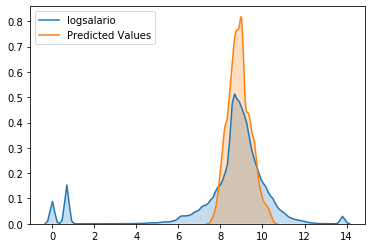

In [64]:
sns.kdeplot(ytrue, shade=True, label='logsalario')
sns.kdeplot(yhat, shade=True, label='Predicted Values')
plt.show()

**Plotando a curva densidade de distribuição (kde) dos erros**

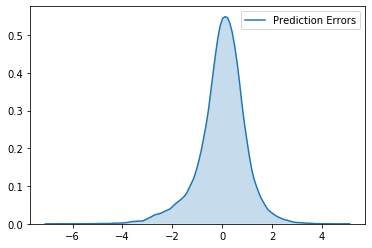

In [65]:
sns.kdeplot(model_full.resid, shade=True, label='Prediction Errors');

### Os erros tem distribuição normal?

**Plotar a distribuição/histograma e comparar com uma curva normal geralmente é suficiente para dizer que nossos erros/residuos são normalmente distribuidos, do contrário podemos supor que existe alguma variável importante que não foi incluida no modelo e portanto tornando nossos parâmetros betas estimados enviesados. Com uma amostra de reduzidos normalmente distribuida, há mais indicios para dizer que ela é causada por alguma aleatoriedade. Mais uma palavra para nosso vocabulario é "idiossincratico", que significa basicamente que o que explica a diferença dos valores previstos para os observados são causados por coisas muito particulares das observações que não devem ser consideradas no modelo, a essas caracteristicas particulares damos o nome de caracteristicas idiossincraticas.**

# Testando o quanto o modelo acerta nas predições

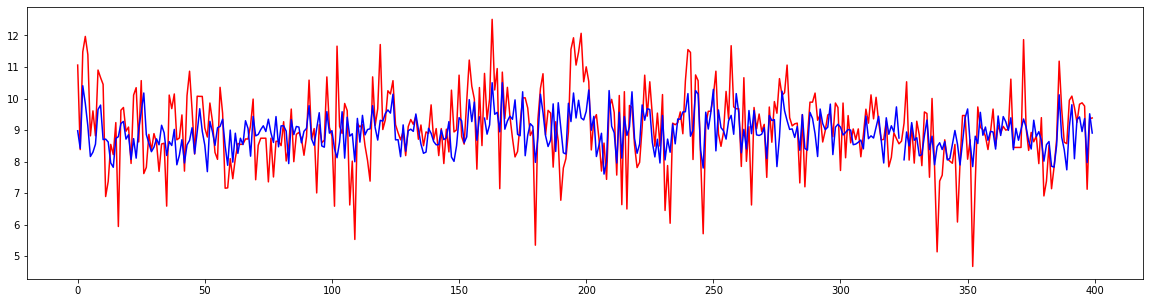

In [67]:
y_ord =np.array(range(0,len(temp.log_salario)))
y_hat = model_full.predict(temp)

plt.figure(figsize=(20,5))
plt.plot(y_ord[:400],temp.log_salario[:400],color="red")
plt.plot(y_ord[:400],y_hat[:400],color="blue")
plt.show()

Verificando os dados do DataFrame **temp** com o **model_full**, o quanto os valores reais de log_salario estão próximos dos valores preditos pelo modelo.